In [73]:
import fsps
import matplotlib.pyplot as plt
import numpy as np
from spec_exam import F_lam_per_M
from glob import glob
from scipy.interpolate import interp1d
import matplotlib.gridspec as gridspec
import seaborn as sea
import pandas as pd
from spec_exam import Gen_spec_2D
from spec_stats import Highest_density_region
from make_sfh_tool import Gen_sim_SFH
import pickle
from astropy.cosmology import FlatLambdaCDM
cosmo = FlatLambdaCDM(H0=70, Om0=0.3)

In [60]:
sp = fsps.StellarPopulation(zcontinuous = 1, logzsol = 0, sfh = 1, dust_type = 2,tau = 1)

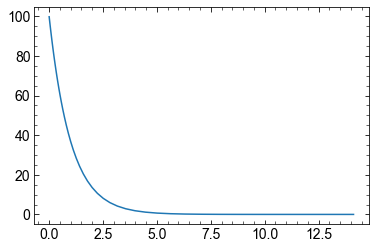

In [61]:
SFR = sp.sfr
plt.plot(10**sp.log_age / 10**9, sp.sfr / np.trapz(sp.sfr, 10**sp.log_age) * 10**11)

In [85]:
sp = fsps.StellarPopulation(zcontinuous = 1, logzsol = 0, sfh = 1, dust_type = 2,tau = 1)
sp.params['dust2'] = 0.5
sp.params['dust1'] = 0.0
sp.params['logzsol'] = np.log10(1)

wave, flux = sp.get_spectrum(tage =5, peraa = True)
flam = F_lam_per_M(flux,wave*(1+1.5),1.5,0,sp.stellar_mass)*10**11

(2000.0, 8000.0)

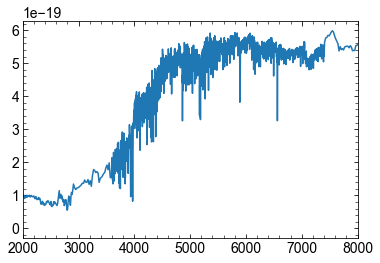

In [86]:
plt.plot(wave,flam)
plt.xlim(2000,8000)

In [37]:
    Gs = Gen_spec_2D('GND', 19591, 1.5, g102_lims=[8200, 11300], g141_lims=[11200, 16000],
        phot_errterm = 0.04, irac_err = 0.08, mask = False)

load_master_fits: /Volumes/Vince_CLEAR/RELEASE_v2.1.0/BEAMS/GN2/GN2_19591.beams.fits
1 icat08hiq_flt.fits G102
2 icat08hnq_flt.fits G102
3 icat08huq_flt.fits G102
4 icat08hzq_flt.fits G102
5 icxt55krq_flt.fits G102
6 icxt55ksq_flt.fits G102
7 icxt55kvq_flt.fits G102
8 icxt55kxq_flt.fits G102
9 icxta4mdq_flt.fits G102
10 icxta4meq_flt.fits G102
11 icxta4mhq_flt.fits G102
12 icxta4mjq_flt.fits G102
13 icxt52i0q_flt.fits G102
14 icxt52i1q_flt.fits G102
15 icxt52i4q_flt.fits G102
16 icxt52i6q_flt.fits G102
17 icxt53i9q_flt.fits G102
18 icxt53iaq_flt.fits G102
19 icxt53idq_flt.fits G102
20 icxt53ifq_flt.fits G102
21 icxt51jvq_flt.fits G102
22 icxt51jwq_flt.fits G102
23 icxt51jzq_flt.fits G102
24 icxt51k1q_flt.fits G102
25 ib3708i5q_flt.fits G141
26 ib3708i9q_flt.fits G141
27 ib3708ilq_flt.fits G141
28 ib3708ipq_flt.fits G141
29 ib3748v8q_flt.fits G141
30 ib3748vdq_flt.fits G141


/Users/Vince.ec/miniconda3/envs/astroconda3.6/lib/python3.6/site-packages/grizli-1.2.dev1648-py3.6-macosx-10.9-x86_64.egg/grizli/multifit.py:1647: RuntimeWarning: divide by zero encountered in true_divide
  ivar = 1./(1/b.ivar + (self.sys_err*sciu)**2)
/Users/Vince.ec/GitHub/Cluster_and_field/scripts/spec_exam.py:787: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if bm.grism.parent_file in BMX:
/Users/Vince.ec/miniconda3/envs/astroconda3.6/lib/python3.6/site-packages/grizli-1.2.dev1648-py3.6-macosx-10.9-x86_64.egg/grizli/model.py:590: RuntimeWarning: invalid value encountered in true_divide
  self.optimal_profile = m/m.sum(axis=0)


False
advanced
False
advanced


In [38]:
from spec_id import Gather_grism_data_from_2d, Full_forward_model, Scale_model
def spec_sim_werr_simple(Gs,wave,flam, lm = 11, z = 1.0):
    wvs, flxs, errs, beams, trans = Gather_grism_data_from_2d(Gs, sp)

    Smfl, Pmfl = Full_forward_model(Gs, wave, flam, z, 
                                    wvs, flxs, errs, beams, trans)
    
    Sc =  Scale_model(Gs.Pflx, Gs.Perr, Pmfl)
    
    for i in range(len(Smfl)):
        Smfl[i] = Smfl[i] + np.random.normal(0,errs[i])/Sc
        Pmfl[i] = Pmfl[i] + np.random.normal(0,Gs.Perr[i])/Sc
    
    return wvs, Smfl, errs/Sc, beams, trans, Pmfl, Gs.Perr/Sc


In [39]:
wvs, flxs, errs, beams, trans, Spmfl, Spmerr = spec_sim_werr_simple(Gs, wave,flam, z = 1.5)

/Users/Vince.ec/GitHub/Cluster_and_field/scripts/spec_id.py:484: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return np.array([wvs, flxs, errs, beams, trans])
/Users/Vince.ec/GitHub/Cluster_and_field/scripts/spec_id.py:337: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return np.array(Gmfl), Pmfl


(3000, 7000)

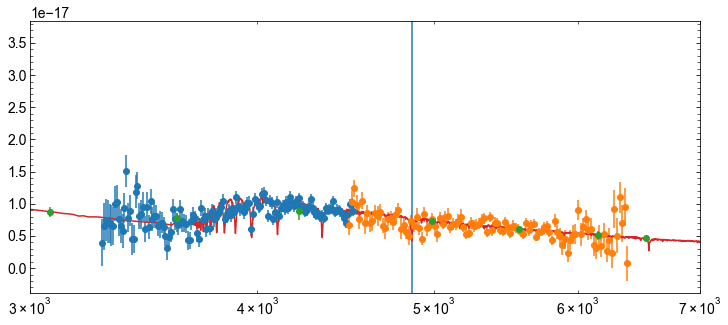

In [43]:
plt.figure(figsize=[12,5])
plt.errorbar(wvs[0]/2.5,flxs[0],errs[0], fmt = 'o')
plt.errorbar(wvs[1]/2.5,flxs[1],errs[1], fmt = 'o')
plt.errorbar(Gs.Pwv/2.5, Spmfl, Spmerr, fmt = 'o')
plt.xscale('log')
plt.axvline(4862.68)
plt.plot(wave,flam)
plt.xlim(3000,7000)

In [68]:
def Z_prior_mu(lmass):
    M = [9, 11.5]
    P = [-0.5813, 0.06818]
    iP = interp1d(M,P)
    return iP(lmass) 

onesig = (0.04 + 0.47)*2
mllim = np.log10(0.001 / 0.019)
mhlim = np.log10(0.031 / 0.019)
    

Text(0, 0.5, '$\\log(Z_*/Z_\\odot)$')

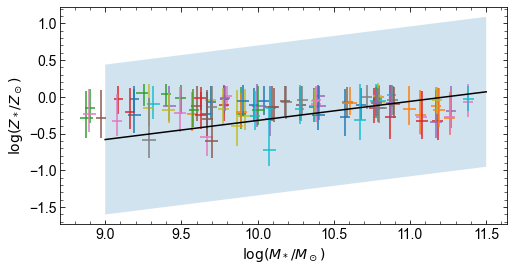

In [109]:
Z= []
LM = []
plt.figure(figsize = [8,4])

for i in range(100):
    fdat = np.load('../data/posteriors/z1.5_{}_s_fits_p4.npy'.format(i+1), allow_pickle = True).item()
    Pm = interp1d(np.cumsum(fdat['Pm'])/max(np.cumsum(fdat['Pm'])), fdat['m'])
    Pl = interp1d(np.cumsum(fdat['Plm'])/max(np.cumsum(fdat['Plm'])), fdat['lm'])
    zm = np.log10(Pm(0.5)) ; zl = (Pm(0.5) - Pm(0.16)) / (np.log(10) * Pm(0.5)) ; zh = (Pm(0.84) - Pm(0.5)) / (np.log(10) * Pm(0.5))
    lm = Pl(0.5) ; ll = lm - Pl(0.16) ; lh = Pl(0.84) - lm 
    
    m, hdr, mod = Highest_density_region(fdat['Pm'], fdat['m'])
#     Z.append(zm)
    Z.append(np.log10(m))
    
    LM.append(lm)
    plt.errorbar(lm,zm, xerr=[[ll],[lh]], yerr=[[zl],[zh]])

# plt.scatter(LM, np.log10(Z), s = 50)
plt.plot(np.linspace(9,11.5), Z_prior_mu(np.linspace(9,11.5)), 'k')
plt.fill_between(np.linspace(9,11.5), Z_prior_mu(np.linspace(9,11.5))-onesig, Z_prior_mu(np.linspace(9,11.5))+onesig, alpha = 0.2)
plt.xlabel('$\log(M_*/M_\odot)$')
plt.ylabel('$\log(Z_*/Z_\odot)$')
# plt.savefig('../plots/simfit_to_metallicity_p3.png', bbox_inches = 'tight')    

/Users/Vince.ec/miniconda3/envs/astroconda3.6/lib/python3.6/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:ylabel='Density'>

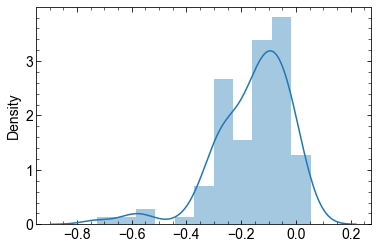

In [108]:
sea.distplot(Z)

/Users/Vince.ec/miniconda3/envs/astroconda3.6/lib/python3.6/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:ylabel='Density'>

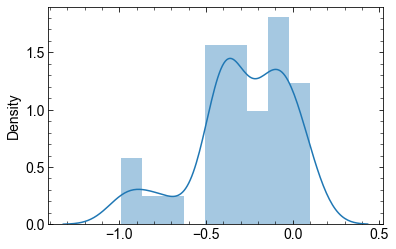

In [110]:
sea.distplot(Z)

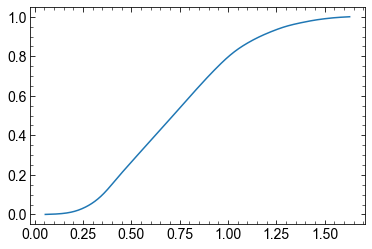

In [77]:
plt.plot(fdat['m'], np.cumsum(fdat['Pm'])/max(np.cumsum(fdat['Pm'])))

Pp = interp1d(np.cumsum(fdat['Pm'])/max(np.cumsum(fdat['Pm'])), fdat['m'])

In [79]:
Pp(0.84)

array(1.05674079)

In [71]:
np.random.seed(101)
lmt = []
for i in range(100):
    lmt.append(np.random.choice(np.linspace(9,11.5, 26)))

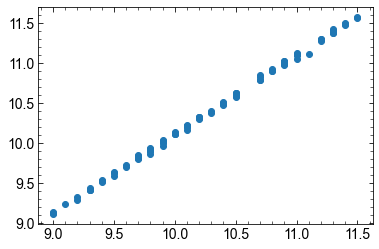

In [72]:
plt.plot(lmt, LM, 'o')

In [64]:
D=[]
for i in range(100):
    fdat = np.load('../data/posteriors/z1.5_{}_s_fits_p2.npy'.format(i+1), allow_pickle = True).item()
    D.append(fdat['d'][fdat['Pd'] == max(fdat['Pd'])])

In [115]:
def Sig_int(er):
    sig = np.zeros(len(er)-1)
    
    for i in range(len(er)-1):
        sig[i] = np.sqrt(er[i]**2 + er[i+1]**2 )
    
    return np.sum((1/2)*sig)

def SN(w, f, e, wmin, wmax):
    
    IDx = [U for U in range(len(w)) if wmin < w[U] < wmax]
    
    return np.trapz(f[IDx])/ Sig_int(e[IDx])

adb = pd.read_pickle('../dataframes/fitdb/evolution_db.pkl')

Bsn = []
Rsn = []
bsn = 0
rsn = 0

idx =0
for i in adb.index:
    Gs = Gen_spec_2D(adb.field[i], adb.id[i], adb.zgrism[i], g102_lims=[8200, 11300], g141_lims=[11200, 16000],
            phot_errterm = 0.04, irac_err = 0.08, mask = False)

    if Gs.g102:
        bsn = SN(Gs.Bwv, Gs.Bfl, Gs.Ber,8500,10500)
    if Gs.g141:
        rsn = SN(Gs.Rwv, Gs.Rfl, Gs.Rer,11500,15500)
    
    Bsn.append(bsn)
    Rsn.append(rsn)
    
    if idx == 3:
        break
    idx += 1
    

load_master_fits: /Volumes/Vince_CLEAR/RELEASE_v2.1.0/BEAMS/GS3/GS3_35640.beams.fits
1 ibhj29ncq_flt.fits G141
2 ibhj29nkq_flt.fits G141
3 ibhj29nsq_flt.fits G141
4 ibhj29nzq_flt.fits G141


/Users/Vince.ec/miniconda3/envs/astroconda3.6/lib/python3.6/site-packages/grizli-1.2.dev1648-py3.6-macosx-10.9-x86_64.egg/grizli/multifit.py:1647: RuntimeWarning: divide by zero encountered in true_divide
  ivar = 1./(1/b.ivar + (self.sys_err*sciu)**2)
/Users/Vince.ec/GitHub/Cluster_and_field/scripts/spec_exam.py:787: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if bm.grism.parent_file in BMX:
/Users/Vince.ec/miniconda3/envs/astroconda3.6/lib/python3.6/site-packages/grizli-1.2.dev1648-py3.6-macosx-10.9-x86_64.egg/grizli/model.py:590: RuntimeWarning: invalid value encountered in true_divide
  self.optimal_profile = m/m.sum(axis=0)


False
advanced
load_master_fits: /Volumes/Vince_CLEAR/RELEASE_v2.1.0/BEAMS/GN3/GN3_37281.beams.fits
1 icat19u2q_flt.fits G102
2 icat19u7q_flt.fits G102
3 icat19ueq_flt.fits G102
4 icat19ujq_flt.fits G102
5 ib3719ukq_flt.fits G141
6 ib3719uoq_flt.fits G141
7 ib3719v7q_flt.fits G141
8 ib3719vbq_flt.fits G141


/Users/Vince.ec/miniconda3/envs/astroconda3.6/lib/python3.6/site-packages/grizli-1.2.dev1648-py3.6-macosx-10.9-x86_64.egg/grizli/multifit.py:1647: RuntimeWarning: divide by zero encountered in true_divide
  ivar = 1./(1/b.ivar + (self.sys_err*sciu)**2)
/Users/Vince.ec/GitHub/Cluster_and_field/scripts/spec_exam.py:787: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if bm.grism.parent_file in BMX:
/Users/Vince.ec/miniconda3/envs/astroconda3.6/lib/python3.6/site-packages/grizli-1.2.dev1648-py3.6-macosx-10.9-x86_64.egg/grizli/model.py:590: RuntimeWarning: invalid value encountered in true_divide
  self.optimal_profile = m/m.sum(axis=0)


False
advanced
False
advanced
load_master_fits: /Volumes/Vince_CLEAR/RELEASE_v2.1.0/BEAMS/ERSPRIME/ERSPRIME_40862.beams.fits
1 icxt20f7q_flt.fits G102
2 icxt20f8q_flt.fits G102
3 icxt20fbq_flt.fits G102
4 icxt20fdq_flt.fits G102
5 icxt21b7q_flt.fits G102
6 icxt21b8q_flt.fits G102
7 icxt21bcq_flt.fits G102
8 icxt21beq_flt.fits G102
9 icxt19o6q_flt.fits G102
10 icxt19o7q_flt.fits G102
11 icxt19oaq_flt.fits G102
12 icxt19ocq_flt.fits G102
13 icxt22pmq_flt.fits G102
14 icxt22pnq_flt.fits G102
15 icxt22pqq_flt.fits G102
16 icxt22psq_flt.fits G102
17 icxt23pvq_flt.fits G102
18 icxt23pwq_flt.fits G102
19 icxt23pzq_flt.fits G102
20 icxt23q1q_flt.fits G102
21 ibhj23sxq_flt.fits G141
22 ibhj23t4q_flt.fits G141
23 ibhj23tbq_flt.fits G141
24 ibhj23tiq_flt.fits G141
25 ib6o23ruq_flt.fits G141
26 ib6o23ryq_flt.fits G141


/Users/Vince.ec/miniconda3/envs/astroconda3.6/lib/python3.6/site-packages/grizli-1.2.dev1648-py3.6-macosx-10.9-x86_64.egg/grizli/multifit.py:1647: RuntimeWarning: divide by zero encountered in true_divide
  ivar = 1./(1/b.ivar + (self.sys_err*sciu)**2)
/Users/Vince.ec/GitHub/Cluster_and_field/scripts/spec_exam.py:787: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if bm.grism.parent_file in BMX:
/Users/Vince.ec/miniconda3/envs/astroconda3.6/lib/python3.6/site-packages/grizli-1.2.dev1648-py3.6-macosx-10.9-x86_64.egg/grizli/model.py:590: RuntimeWarning: invalid value encountered in true_divide
  self.optimal_profile = m/m.sum(axis=0)


False
advanced
False
advanced
load_master_fits: /Volumes/Vince_CLEAR/RELEASE_v2.1.0/BEAMS/GN5/GN5_35835.beams.fits
1 icat18kbq_flt.fits G102
2 icat18kgq_flt.fits G102
3 icat18knq_flt.fits G102
4 icat18ksq_flt.fits G102


/Users/Vince.ec/miniconda3/envs/astroconda3.6/lib/python3.6/site-packages/grizli-1.2.dev1648-py3.6-macosx-10.9-x86_64.egg/grizli/multifit.py:1647: RuntimeWarning: divide by zero encountered in true_divide
  ivar = 1./(1/b.ivar + (self.sys_err*sciu)**2)


load_master_fits: /Volumes/Vince_CLEAR/RELEASE_v2.1.0/BEAMS/GN3/GN3_35835.beams.fits
1 icat18kbq_flt.fits G102
2 icat18kgq_flt.fits G102
3 icat18knq_flt.fits G102
4 icat18ksq_flt.fits G102
5 icat19u2q_flt.fits G102
6 icat19u7q_flt.fits G102
7 icat19ueq_flt.fits G102
8 icat19ujq_flt.fits G102
9 ib3718aiq_flt.fits G141
10 ib3718amq_flt.fits G141
11 ib3718ayq_flt.fits G141
12 ib3718b2q_flt.fits G141


/Users/Vince.ec/GitHub/Cluster_and_field/scripts/spec_exam.py:787: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if bm.grism.parent_file in BMX:
/Users/Vince.ec/miniconda3/envs/astroconda3.6/lib/python3.6/site-packages/grizli-1.2.dev1648-py3.6-macosx-10.9-x86_64.egg/grizli/model.py:590: RuntimeWarning: invalid value encountered in true_divide
  self.optimal_profile = m/m.sum(axis=0)


False
advanced
False
advanced


In [117]:
Rsn


[5.168875722301885, 4.055640624937288, 21.02718566918512, 6.526497963521335]